### import librrary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### select columns

In [2]:
columns = [
    'wifi_01',
    'wifi_02',
    'wifi_03',
    'wifi_04',
    'wifi_05',
    'wifi_06',
    'wifi_07',
    'room'
    ]

### read data to matrix

In [3]:
def redData(path):
    # read selected data
    data = pd.read_csv(path,usecols=columns)
    
    # rescaling data
    for i in range(0,len(columns)-1):
        data[columns[i]] = (data[columns[i]] - data[columns[i]].min()) / (data[columns[i]].max()-data[columns[i]].min())
    
    # convert data to numpy matrix
    cols = data.shape[1]
    xd = data.iloc[:,0:cols-1]
    yd = data.iloc[:,cols-1:cols] 
    x = np.matrix(xd.values)
    y = np.matrix(yd.values)
    
    ones = np.ones((x.shape[0],1))
    x = np.hstack([ones, x])
    
    return x,y,data

### sigmoid function return probability between 1 and 0

In [4]:
def sigmoid_function(a):
    return 1.0 / (1 + np.exp(-a))

### gradient Descent function return old theta

In [5]:
def gradient_Descent_function( _x , _y, _theta, _learning_rate):
    m = _x.shape[1]
    h = sigmoid_function(np.matmul(_x, _theta))
    grad = np.matmul(_x.T, (h - _y)) / m;
    _theta = _theta - _learning_rate * grad
    return _theta

### Report in order to get less error and better theta

In [6]:
def gradient_Descent_Iterations_function( _x , _y , _learning_rate, _repetition):
    _theta  = np.matrix(np.zeros(_x.shape[1])).reshape([-1, 1])
    costs = np.zeros(_repetition)
    for i in range(_repetition):
        _theta = gradient_Descent_function(_x, _y,_theta, _learning_rate)
        costs[i] = cost_function(_x, _y, _theta)
    return _theta , costs

### cost function 

In [7]:
def cost_function(x, y, theta):
    m = x.shape[0]
    h = sigmoid_function(np.matmul(x, theta))
    cost = (np.matmul(-y.T, np.log(h)) - np.matmul((1 -y.T), np.log(1 - h)))/m
    return cost

### predict_function

In [8]:
def predict_function(theta, X):
    probability = sigmoid_function(X * theta)
    return [1 if x >= 0.5 else 0 for x in probability]

### accuracy function

In [9]:
def accuracy_function(_y,_p):
    sizeArray = len(_y)
    trueVal = 0
    errorVal = 0
    for i in range(0, sizeArray):
        if _y[i] == _p[i]:
            trueVal += 1
        else:
            errorVal +=1
    accuracy = trueVal*100 / sizeArray
    print ( 
        (
           'true  prediction {1}\n'+
           'wrong prediction {2}\n'+
           'total prediction {3}\n'+
           'accuracy = {0:5.2f}% \n'
        ).format(accuracy,trueVal, errorVal ,sizeArray))

### plot costs of trining

In [10]:
def plot_cost(_costs):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.plot(np.arange(len(_costs)), _costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Cost vs. Training')
    plt.show()

In [11]:
def plotOne(_data,_theta,xName,yName):
    room_0 = _data[_data['room'].isin([0])]
    room_1 = _data[_data['room'].isin([1])]
    
    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(room_0[xName], room_0[yName], s=10, c='r', marker='.', label='0')
    ax.scatter(room_1[xName], room_1[yName], s=10, c='b', marker='.', label='1')

    ax.legend()
    ax.set_xlabel(xName)
    ax.set_ylabel(yName)

    _theta = np.hstack(np.array(_theta))
    x = np.linspace(_data[xName].min(), _data[xName].max(), 50)
    

    #somTheta = 0
    #for i in (1,X.shape[1]-1):
    #    somTheta = somTheta + _theta[i]  
    #f =  _theta[0] + somTheta * x/7
    
    f =  _theta[0] + ( _theta[columns.index(xName)+1] + _theta[columns.index(yName)+1])*x
    f = np.hstack(np.array(f))
    
    ax.plot(x, f, 'g', label='decision boundary')
    ax.legend()
    plt.show()

In [12]:
def plotAll(_data,_theta):
    for i in range(0,len(columns)-1):
        for j in range(i+1,len(columns)-1):
            print(columns[i],columns[j])
            plotOne(_data,_theta,columns[i],columns[j])

theta of gradientDescent : [[ 13.48726601]
 [-14.11161335]
 [  5.607026  ]
 [-11.17512497]
 [-14.10770794]
 [-12.49717083]
 [  2.54976206]
 [  0.83564795]]
cost  of gradientDescent : [[0.03989319]]


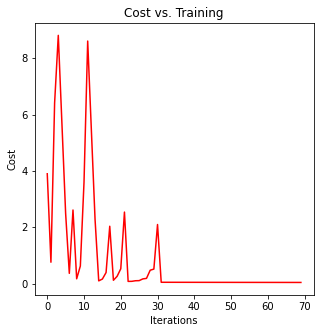

In [13]:
X,Y,data = redData('../data/data_clean_one_vs_rest_1.csv')
    
n_iterations  = 70 
learning_rate = 0.1 

theta ,costs =gradient_Descent_Iterations_function(X,Y,learning_rate,n_iterations)

print('theta of gradientDescent :',theta)
print('cost  of gradientDescent :',cost_function(X, Y, theta))

plot_cost(costs)

In [14]:
p = predict_function(theta,X)
accuracy_function(Y, p)

true  prediction 1989
wrong prediction 11
total prediction 2000
accuracy = 99.45% 



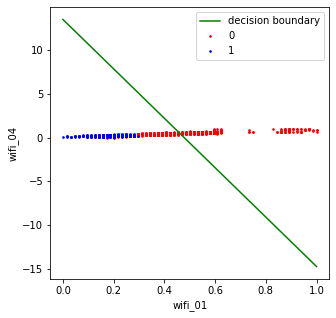

In [15]:
plotOne(data,theta,'wifi_01','wifi_04')

### multi class classification

In [16]:
# return index of default class from lit of theta of new x 
def get_index_default_class_of_x(_theta_all,_x_new):
    _probabilities = []
    for i in range(0,len(theta_all)):
        _probability = sigmoid_function(_x_new * _theta_all[i])
        _probabilities.append(_probability)
    _index_of_max = np.argmax(_probabilities)
    print('probabilities : ',_probabilities,)
    print('max probability in index: ',_index_of_max,)
    return _index_of_max
    
# triing all model 
def run_trining(_paths):
    _n_iterations  = 500
    _learning_rate = 0.1
    
    _theta_all = []
    for i in range(0,len(_paths)):
        _X,_Y,_data = redData(_paths[i])
        _theta ,_ =gradient_Descent_Iterations_function(_X,_Y,_learning_rate,_n_iterations)
        _theta_all.append(_theta)
    return _theta_all
# ------------------------------------
paths_ovr= ['../data/data_clean_one_vs_rest_1.csv',
            '../data/data_clean_one_vs_rest_2.csv',
            '../data/data_clean_one_vs_rest_3.csv',
            '../data/data_clean_one_vs_rest_4.csv']

theta_all = run_trining(paths_ovr)
# ------------------------------------
#XX,_,_ = redData(paths_ovr[0])
#print(XX[1300])
_x_new_1 = [[1.,0.1,0.6,0.3,0.1,0.3,0.4,0.4]]
_x_new_2 = [[1.,0.5,0.6,0.5,0.6,0.5,0.8,0.8]]

index_of_max = get_index_default_class_of_x(theta_all,_x_new_2)


print("default class of new x is : {0} : room : {1}".format(paths_ovr[index_of_max],index_of_max+1))

probabilities :  [matrix([[3.06136095e-05]]), matrix([[0.99958351]]), matrix([[1.08515924e-15]]), matrix([[2.30538375e-08]])]
max probability in index:  1
default class of new x is : ../data/data_clean_one_vs_rest_2.csv : room : 2
